# Training Models

## Linear Regression

`y_hat = Hypothesis_fn(x) = Model_param_vector . x`

where,

* `Model_param_vector` contains the bias term and the feature weights
* `x` is the instance's `feature vector`
* `Model_param_vector . x` is the dot product of both


### The Normal Equation

![The normal equation Illustration](img/normal_eq_illus.png)

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + gaussian_noice

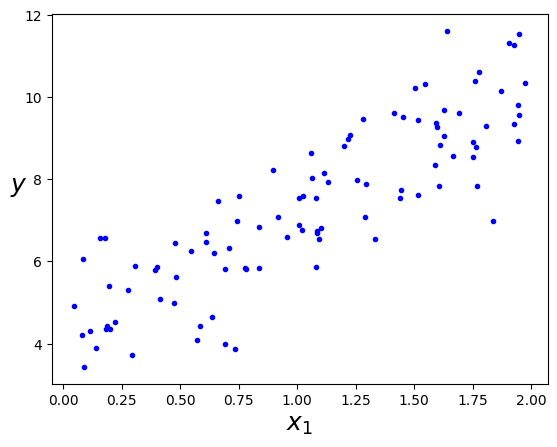

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Now let's compute Theta using the Normal Equation.

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.16890474],
       [3.01342408]])

In [10]:
X.shape, X_b.shape, y.shape, theta_best.shape

((100, 1), (100, 2), (100, 1), (2, 1))

In [11]:
X_b

array([[1.        , 0.07930257],
       [1.        , 1.6289756 ],
       [1.        , 0.1565797 ],
       [1.        , 1.25671682],
       [1.        , 1.90441748],
       [1.        , 1.08392867],
       [1.        , 0.27640882],
       [1.        , 0.57100686],
       [1.        , 1.63976411],
       [1.        , 0.89810423],
       [1.        , 1.76031351],
       [1.        , 1.50286638],
       [1.        , 1.29423199],
       [1.        , 1.08039987],
       [1.        , 0.83660807],
       [1.        , 0.58363021],
       [1.        , 0.08524559],
       [1.        , 0.91575643],
       [1.        , 1.9436717 ],
       [1.        , 1.05919622],
       [1.        , 0.47102435],
       [1.        , 1.02523384],
       [1.        , 0.14030549],
       [1.        , 1.44143865],
       [1.        , 0.78008948],
       [1.        , 0.1995087 ],
       [1.        , 0.19667546],
       [1.        , 1.97511248],
       [1.        , 1.76369562],
       [1.        , 0.77778311],
       [1.

We hoped for `theta_0 = 4` and `theta_1 = 3`, but got `theta_0 = 4.060948` and `theta_1 = 2.962968`. The noise made it impossible to recover the exact params.

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16890474],
       [10.1957529 ]])

Predictions for `X = (0, 1)` is `y = (4.060948, 9.986884)`.

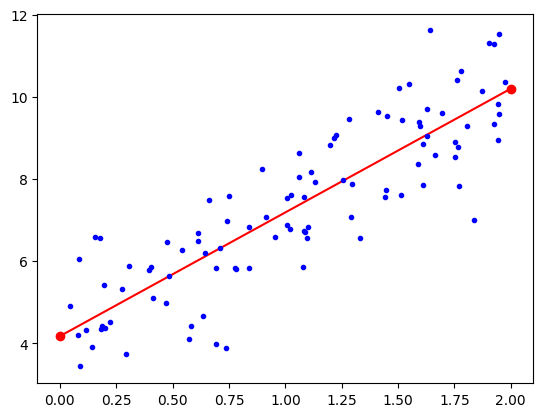

In [6]:
plt.plot(X_new, y_predict, 'r-o')
plt.plot(X, y, 'b.')
plt.show()

### Understanding Dot and Cross product of Matrices

In [53]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
B = np.array([
    [1, 2],
    [1, 2],
    [1, 2]
])

In [54]:
A.dot(B)

array([[ 6, 12],
       [15, 30],
       [24, 48]])

### Understanding the Normal Equation

In [38]:
Xl = np.array([1,2,3])
y = 4 + 3 * Xl

In [39]:
Xl

array([1, 2, 3])

In [40]:
y

array([ 7, 10, 13])

In [41]:
Xl_b = np.c_[np.ones((3, 1)), Xl]
Xl_b

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [42]:
Xl_b.T

array([[1., 1., 1.],
       [1., 2., 3.]])

In [43]:
Xl_b.T.dot(Xl_b)

array([[ 3.,  6.],
       [ 6., 14.]])

In [44]:
np.linalg.inv(Xl_b.T.dot(Xl_b))

array([[ 2.33333333, -1.        ],
       [-1.        ,  0.5       ]])

In [45]:
np.linalg.inv(Xl_b.T.dot(Xl_b)).dot(Xl_b.T)

array([[ 1.33333333,  0.33333333, -0.66666667],
       [-0.5       ,  0.        ,  0.5       ]])

In [55]:
np.linalg.inv(Xl_b.T.dot(Xl_b)).dot(Xl_b.T).dot(y)

array([4., 3.])

### Linear Regression using Scikit-Learn

The same Linear Regression using Scikit-Learn:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16890474]), array([[3.01342408]]))

The above is the `theta_0` and `theta_1`.

In [8]:
sk_y_predict = lin_reg.predict(X_new)
sk_y_predict

array([[ 4.16890474],
       [10.1957529 ]])

Predictions for `X = (0, 1)` is `y = (4.060948, 9.986884)`.

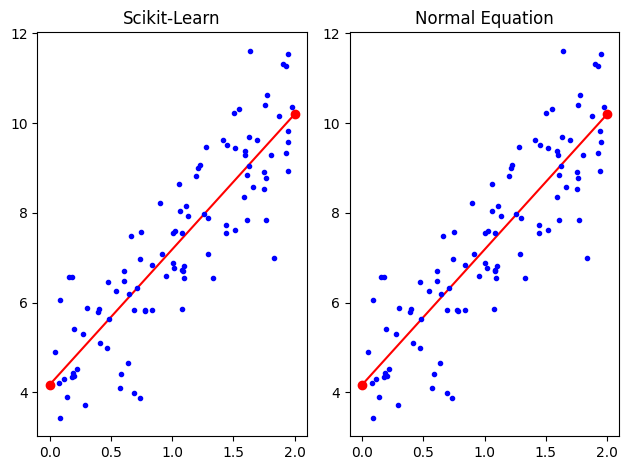

In [9]:
plt.subplot(1, 2, 1).plot(X_new, sk_y_predict, 'r-o')
plt.subplot(1, 2, 1).plot(X, y, 'b.')
plt.subplot(1, 2, 1).set_title('Scikit-Learn')
plt.subplot(1, 2, 2).plot(X_new, y_predict, 'r-o')
plt.subplot(1, 2, 2).plot(X, y, 'b.')
plt.subplot(1, 2, 2).set_title('Normal Equation')
plt.tight_layout()
plt.show()

## Gradient Descent

Gradient Descent is a generic optimisation algorithm capable of finding optimal solutions to a wide range of problems. The general idea of GD is to tweak parameters iteratively in order to minimise a Cost function.

> When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

### Batch Gradient Descent

![PDE of Cost function](img/pde-of-cost-fn.png)

To implement GD, you need to compute the gradient of the `Cost function` in regard to each model parameter `Theta_j`. You need to calculate how much the `Cost function` will change if you change `Theta_j` just a little bit.